# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
import pandas_datareader.data as web

Primero importaremos datos desde un archivo con extensión `.csv`

In [2]:
import pandas as pd

data = pd.read_csv("FB.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...,...
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600


In [3]:
data.head() # Muestra los primeros cinco datos

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [5]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300


In [6]:
data.tail() # Muestra los últimos cinco datos

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600
1005,2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300


In [8]:
data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600
1005,2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300


Ahora lo haremos desde Yahoo Finance

In [11]:
web.DataReader?

In [13]:
data = web.DataReader("FB", "yahoo", "2020-03-14", "2022-03-27")
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-21,214.710007,207.630005,214.500000,211.490005,30142300,211.490005
2022-03-22,219.460007,210.179993,211.369995,216.649994,31998800,216.649994
2022-03-23,216.800003,212.160004,213.330002,213.460007,23717300,213.460007
2022-03-24,220.669998,214.789993,215.000000,219.570007,31502300,219.570007
2022-03-25,225.500000,218.889999,220.509995,221.820007,40010500,221.820007


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [14]:
data["Open"]

Date
2020-03-16    152.320007
2020-03-17    150.740005
2020-03-18    139.750000
2020-03-19    146.619995
2020-03-20    156.020004
                 ...    
2022-03-21    214.500000
2022-03-22    211.369995
2022-03-23    213.330002
2022-03-24    215.000000
2022-03-25    220.509995
Name: Open, Length: 513, dtype: float64

In [15]:
def getClose(name, start, end) :
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

In [18]:
data = getClose("FB", "2022-01-01", "2022-02-01")

¿Cómo lucen estos datos?

In [41]:
names = ["FB", "NFLX", "TSLA"]
data = getClose(names, "2019-01-01", "2022-03-27")
data.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-02,135.679993,267.660004,62.023998
2019-01-03,131.740005,271.200012,60.071999
2019-01-04,137.949997,297.570007,63.537998
2019-01-07,138.050003,315.339996,66.991997
2019-01-08,142.529999,320.269989,67.070000


In [42]:
data.mean()

Symbols
FB      246.183657
NFLX    442.797079
TSLA    413.845030
dtype: float64

In [43]:
data.std()

Symbols
FB       64.830265
NFLX    105.901159
TSLA    349.693893
dtype: float64

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [44]:
data.describe()

Symbols,FB,NFLX,TSLA
count,815.000000,815.000000,815.000000
mean,246.183657,442.797079,413.845030
std,64.830265,105.901159,349.693893
min,131.740005,254.589996,35.793999
25%,189.165001,354.529999,65.429001
50%,234.500000,443.399994,328.600006
75%,302.599991,520.804993,707.880005
max,382.179993,691.690002,1229.910034


In [45]:
data["NFLX"] # Extraer datos por columna

Date
2019-01-02    267.660004
2019-01-03    271.200012
2019-01-04    297.570007
2019-01-07    315.339996
2019-01-08    320.269989
                 ...    
2022-03-21    374.589996
2022-03-22    382.920013
2022-03-23    374.489990
2022-03-24    375.709991
2022-03-25    373.850006
Name: NFLX, Length: 815, dtype: float64

In [46]:
data.loc["2022-01-25"]

Symbols
FB      300.149994
NFLX    366.420013
TSLA    918.400024
Name: 2022-01-25 00:00:00, dtype: float64

In [47]:
data.iloc[0] # Primer dato

Symbols
FB      135.679993
NFLX    267.660004
TSLA     62.023998
Name: 2019-01-02 00:00:00, dtype: float64

In [48]:
data.iloc[-1] # Último dato

Symbols
FB       221.820007
NFLX     373.850006
TSLA    1010.640015
Name: 2022-03-25 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

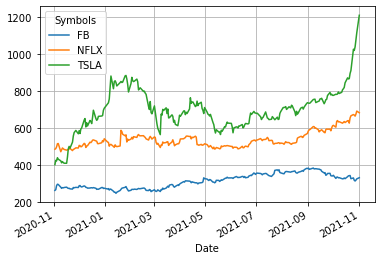

In [69]:
%matplotlib inline
data.loc["2020-11-01" : "2021-11-01"].plot(grid=True)

In [53]:
import numpy as np
np.argmin(data["NFLX"])

183

In [56]:
data.iloc[183]

Symbols
FB      181.279999
NFLX    254.589996
TSLA     44.641998
Name: 2019-09-24 00:00:00, dtype: float64

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'NFLX'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

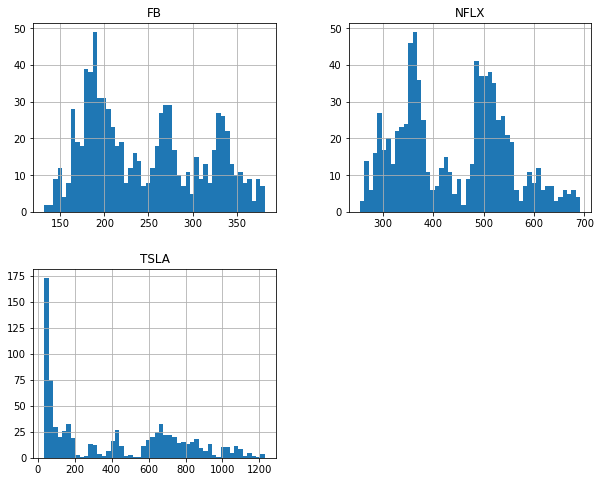

In [68]:
data.hist(figsize=(10, 8), bins=50)

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [71]:
S = data.shift()
S.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,135.679993,267.660004,62.023998
2019-01-04,131.740005,271.200012,60.071999
2019-01-07,137.949997,297.570007,63.537998
2019-01-08,138.050003,315.339996,66.991997


In [72]:
data.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-02,135.679993,267.660004,62.023998
2019-01-03,131.740005,271.200012,60.071999
2019-01-04,137.949997,297.570007,63.537998
2019-01-07,138.050003,315.339996,66.991997
2019-01-08,142.529999,320.269989,67.070000


y la gráfica de los rendimientos se puede obtener como...

In [73]:
R = (data - data.shift())/data.shift()
R.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.029039,0.013226,-0.031472
2019-01-04,0.047138,0.097234,0.057697
2019-01-07,0.000725,0.059717,0.054361
2019-01-08,0.032452,0.015634,0.001164


In [74]:
R = R.dropna()
R.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-03,-0.029039,0.013226,-0.031472
2019-01-04,0.047138,0.097234,0.057697
2019-01-07,0.000725,0.059717,0.054361
2019-01-08,0.032452,0.015634,0.001164
2019-01-09,0.011927,-0.000968,0.009483


<AxesSubplot:xlabel='Date'>

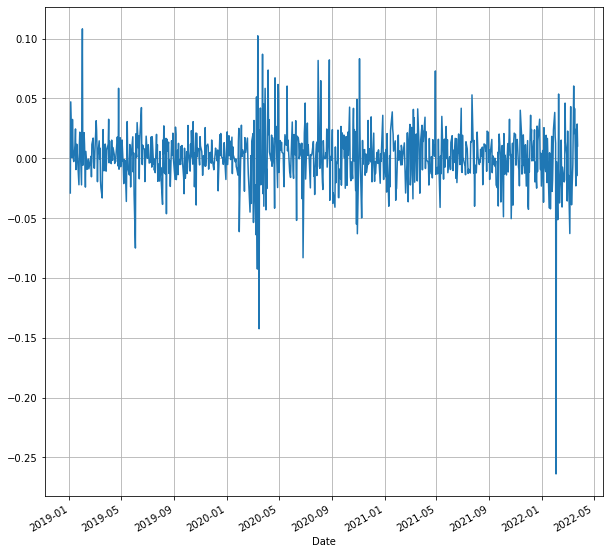

In [81]:
R["FB"].plot(figsize=(10, 10), grid=True)

In [80]:
R.describe()

Symbols,FB,NFLX,TSLA
count,814.000000,814.000000,814.000000
mean,0.000913,0.000751,0.004329
std,0.024501,0.025994,0.042382
min,-0.263901,-0.217905,-0.210628
25%,-0.010863,-0.011849,-0.016537
50%,0.001026,0.000793,0.002627
75%,0.013999,0.013846,0.023685
max,0.108164,0.168543,0.198949


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [82]:
import numpy as np
r = np.log(data/data.shift()).dropna()
r.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-03,-0.029469,0.013139,-0.031978
2019-01-04,0.046061,0.092793,0.056094
2019-01-07,0.000725,0.058002,0.052935
2019-01-08,0.031937,0.015513,0.001164
2019-01-09,0.011857,-0.000968,0.009438


In [85]:
r = (np.log(data) - np.log(data.shift())).dropna()
r.head()

Symbols,FB,NFLX,TSLA
Date,,,
2019-01-03,-0.029469,0.013139,-0.031978
2019-01-04,0.046061,0.092793,0.056094
2019-01-07,0.000725,0.058002,0.052935
2019-01-08,0.031937,0.015513,0.001164
2019-01-09,0.011857,-0.000968,0.009438


<AxesSubplot:xlabel='Date'>

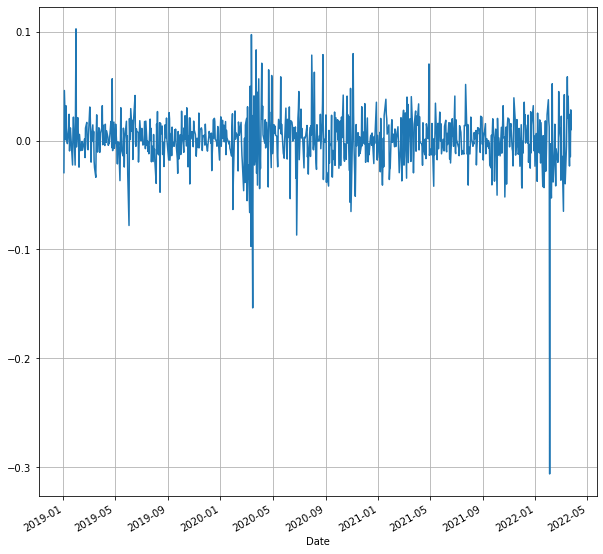

In [86]:
r["FB"].plot(figsize=(10, 10), grid=True)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'NFLX'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

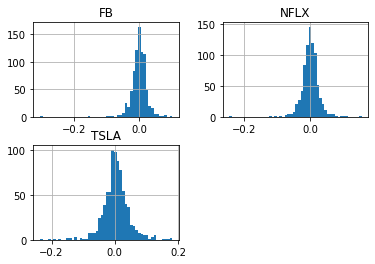

In [88]:
r.hist(bins=50)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.